In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from breakthrough import *
from tqdm import tqdm

Version:  0.2.23


In [3]:
from nn import NumpyNetTable

Version  1.0.6
nn 0 0 2


In [4]:
def all_possible_moves():
    all_moves=[]
    for start in range(9):
        for end in range(9):
            move=[start,end]
            all_moves.append(move)
            
    return all_moves

def state_to_X(state):  # this works for ints (like Nim)
    import numpy as np
    N2=len(state)
    arr=np.zeros((1,N2))  # number of samples, size
    for i in range(N2):
        if state[i]==0:
            arr[0,i]=0
        elif state[i]==1:
            arr[0,i]=1
        elif state[i]==2:
            arr[0,i]=-1
                     
    return arr

In [5]:
print(all_possible_moves())

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8]]


In [6]:
state=initial_state()
initial_X=state_to_X(state)
all_moves=all_possible_moves()

print(state)
print(initial_X)

 v  v  v 
 .  .  . 
 ^  ^  ^ 

[[-1. -1. -1.  0.  0.  0.  1.  1.  1.]]


In [7]:
Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                })

In [8]:
Q.output(state)

[array([0.6990665 , 0.35593546, 0.56040469, 0.71652136, 0.6070703 ]),
 array([-0.16600044, -0.19832271,  0.02599315, -0.71585346,  0.54748756,
         0.58940062,  0.20303619, -0.13146142,  0.48970653,  0.81163953,
        -0.28645909,  0.07375856,  0.53582004, -0.47025594, -0.56968982,
        -0.50955089,  0.20588656,  0.28277989,  0.22687529,  0.00818831,
        -0.32344849,  0.48275524,  0.00313068,  0.1833398 ,  0.31850547,
         0.45729623,  0.04113618,  0.0827571 , -0.74278721,  0.46797676,
         0.0620613 , -0.12454773, -0.58264144, -0.58649297, -0.19683037,
        -0.48811236,  0.53425169, -0.41709602, -0.41228211, -0.51318347,
         0.62353019,  0.49310205, -0.01833878,  0.12100295,  0.61409203,
        -0.24485823, -0.47136688, -0.46300223,  0.3516533 , -0.41793764,
         0.59417388, -0.44109482,  0.59876649,  0.05503878,  0.04630341,
        -0.01328321, -0.77776032,  0.3810003 , -0.13662756, -0.21929538,
        -0.25385393,  0.04658435, -0.59831566, -0.1937

In [9]:
state[0]

2

In [10]:
len(initial_X)

1

In [11]:
Q[state]

{(0, 0): -0.16600043609778078,
 (0, 1): -0.19832270854310652,
 (0, 2): 0.025993149132542057,
 (0, 3): -0.7158534648216873,
 (0, 4): 0.5474875648718305,
 (0, 5): 0.5894006243790243,
 (0, 6): 0.2030361890872435,
 (0, 7): -0.1314614160224663,
 (0, 8): 0.4897065335131867,
 (1, 0): 0.8116395325203728,
 (1, 1): -0.28645909203954595,
 (1, 2): 0.07375855869599766,
 (1, 3): 0.5358200414201795,
 (1, 4): -0.4702559360963472,
 (1, 5): -0.5696898225056573,
 (1, 6): -0.5095508908291423,
 (1, 7): 0.20588655749499238,
 (1, 8): 0.28277989279270066,
 (2, 0): 0.2268752934591829,
 (2, 1): 0.008188309828864461,
 (2, 2): -0.32344849490916555,
 (2, 3): 0.48275523851693963,
 (2, 4): 0.0031306793957495884,
 (2, 5): 0.18333979590450747,
 (2, 6): 0.31850547471167495,
 (2, 7): 0.4572962291563598,
 (2, 8): 0.04113618083105317,
 (3, 0): 0.08275710078313007,
 (3, 1): -0.7427872062437548,
 (3, 2): 0.46797676156402895,
 (3, 3): 0.062061297314373265,
 (3, 4): -0.12454772723279606,
 (3, 5): -0.5826414352943142,
 (3, 6):

In [12]:
target=[]
actual_moves=valid_moves(state,1)
for i,move in enumerate(all_moves):
    if move in actual_moves:  # keep the old values for valid moves
        target.append(1)
    else:
        target.append(-1)  # lose with illegal move

In [13]:
np.array(target)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1])

In [14]:
Q[state]=target

In [15]:
Q[state]

{(0, 0): -0.16774551274516386,
 (0, 1): -0.20029976940943997,
 (0, 2): 0.02330858854981336,
 (0, 3): -0.7140897270437893,
 (0, 4): 0.5439651065852462,
 (0, 5): 0.5857223435945801,
 (0, 6): 0.19913704767528698,
 (0, 7): -0.1339367938919547,
 (0, 8): 0.48567797260634943,
 (1, 0): 0.8095021675895784,
 (1, 1): -0.28776251410192005,
 (1, 2): 0.0704974100811286,
 (1, 3): 0.5322415955483655,
 (1, 4): -0.46964753675539184,
 (1, 5): -0.5685884099999599,
 (1, 6): -0.5084870091489231,
 (1, 7): 0.20251511234577713,
 (1, 8): 0.278526782416033,
 (2, 0): 0.22290566362685593,
 (2, 1): 0.004929272321059819,
 (2, 2): -0.3240365108110317,
 (2, 3): 0.47903206304554247,
 (2, 4): -5.5649973241233415e-05,
 (2, 5): 0.1800685980131901,
 (2, 6): 0.31446256446224197,
 (2, 7): 0.45376193381430974,
 (2, 8): 0.038044583315231,
 (3, 0): 0.07881685844676217,
 (3, 1): -0.7410707808619112,
 (3, 2): 0.4646809083096397,
 (3, 3): 0.05864330633269561,
 (3, 4): -0.12702903879687702,
 (3, 5): -0.5817471530252594,
 (3, 6): -0

In [16]:
def QNN_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    
    new_state=state
    new_actual_moves=valid_moves(new_state,player)
    new_action_values=Q[new_state]
    new_values=[new_action_values[move] for move in new_actual_moves] 
    
    if random.random()<epsilon:  # random move
        action=random_choice(new_actual_moves)
    else:
        action=top_choice(new_actual_moves,weights=new_values)
            
            
#         # Ask the model for the Q values of the old state (inference)
#         old_state_Q_values = self.get_Q(old_state)

#         # Ask the model for the Q values of the new state (inference)
#         new_state_Q_values = self.get_Q(new_state)

#         # Real Q value for the action we took. This is what we will train towards.
#         old_state_Q_values[action] = reward + self.discount * np.amax(new_state_Q_values)
        
    if alpha==0:  # no learning
        return action

    if not last_action is None:  # anything but the first move
        r=0.0  # no reward middle of game
        possible_moves=Q.all_moves
        
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r + gamma*max(new_values))  # max of actually available values
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target
        
    return action

def QNN_post(status,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if alpha==0.0:  # no update if not learning
        return
    
    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    elif status=='stalemate':
        r=0.5
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        possible_moves=Q.all_moves
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r)  # just the reward
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target


In [23]:
Q1_agent=Agent(QNN_move)
Q1_agent.post=QNN_post

Q1_agent.alpha=0.03  # learning rate
Q1_agent.gamma=0.9  # memory
Q1_agent.epsilon=0.1  # chance of making a random move

Q1_agent.original_alpha=Q1_agent.alpha

Q2_agent=Agent(QNN_move)
Q2_agent.post=QNN_post

Q2_agent.alpha=0.03  # learning rate
Q2_agent.gamma=0.9  # memory
Q2_agent.epsilon=0.1  # chance of making a random move

Q2_agent.original_alpha=Q2_agent.alpha


### set the Q tables for the agents

In [27]:
state=initial_state()
initial_X=state_to_X(state)
all_moves=all_possible_moves()

print(state)
print(initial_X)

Q1_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

Q2_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

# initialize things
Q1_agent.Q[state]=[0]*len(all_possible_moves())
Q2_agent.Q[state]=[0]*len(all_possible_moves())


 v  v  v 
 .  .  . 
 ^  ^  ^ 

[[-1. -1. -1.  0.  0.  0.  1.  1.  1.]]


In [28]:


W=[]
L=[]
T=[]

n=[]
games_per_epoch=100
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=0.1
    Q1_agent.alpha=0.03
    Q2_agent.epsilon=0.1
    Q2_agent.alpha=0.03
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(random_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


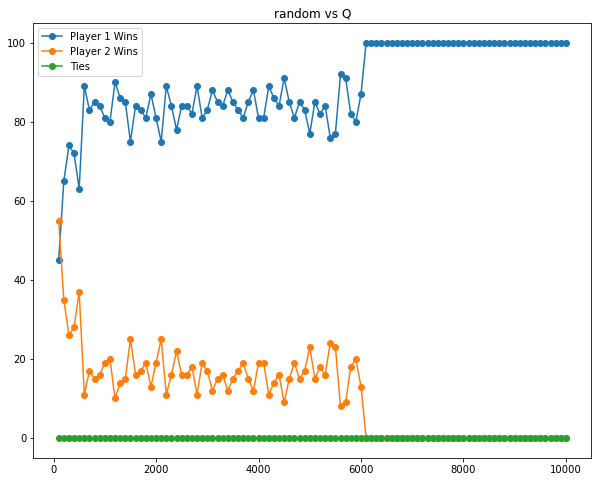

In [29]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs Q')
legend()